In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_excel('base_de_datos_vel.xlsx')


In [7]:
df.head(20)

,Level_number,DEPTH,DELTA_DEPTH,DELTA_TIME,ACOUSTIC_INTERVAL_VEL,AVERAGE_VEL
0,1.0,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,7870.0,NaN
2,2.0,414.3,NaN,NaN,NaN,7870.0
3,NaN,NaN,15.7,0.0023,6913.0,NaN
4,3.0,430.0,NaN,NaN,NaN,7830.0
5,NaN,NaN,15.7,0.0025,6345.0,NaN
6,4.0,445.7,NaN,NaN,NaN,7766.0
7,NaN,NaN,15.7,0.0026,6014.0,NaN
8,5.0,461.4,NaN,NaN,NaN,7690.0
9,NaN,NaN,15.7,0.0027,5835.0,NaN


In [10]:
df_cleaned=df


# iNTERPOLACIÓN DE VALORES DE PROFUNDIDAD

In [11]:
df_cleaned['DEPTH'] = df_cleaned['DEPTH'].interpolate()

In [12]:
df_cleaned

,Level_number,DEPTH,DELTA_DEPTH,DELTA_TIME,ACOUSTIC_INTERVAL_VEL,AVERAGE_VEL
0,1.0,0.00,NaN,NaN,NaN,NaN
1,NaN,207.15,NaN,NaN,7870.0,NaN
2,2.0,414.30,NaN,NaN,NaN,7870.0
3,NaN,422.15,15.7,0.0023,6913.0,NaN
4,3.0,430.00,NaN,NaN,NaN,7830.0
...,...,...,...,...,...,...
1012,507.0,8198.80,NaN,NaN,NaN,9529.0
1013,NaN,8206.65,15.7,0.0010,15022.0,NaN
1014,508.0,8214.50,NaN,NaN,NaN,9536.0
1015,NaN,8222.35,15.7,0.0011,14523.0,NaN


Solo vamos a usar 3 columnas: 'DEPTH','ACOUSTIC_INTERVAL_VEL','DELTA_DEPTH'

In [13]:
df_cleaned=df_cleaned[['DEPTH','ACOUSTIC_INTERVAL_VEL','DELTA_DEPTH']] 

In [14]:
df_cleaned

,DEPTH,ACOUSTIC_INTERVAL_VEL,DELTA_DEPTH
0,0.00,NaN,NaN
1,207.15,7870.0,NaN
2,414.30,NaN,NaN
3,422.15,6913.0,15.7
4,430.00,NaN,NaN
...,...,...,...
1012,8198.80,NaN,NaN
1013,8206.65,15022.0,15.7
1014,8214.50,NaN,NaN
1015,8222.35,14523.0,15.7




Los valores están es pies y pies/s. Vamos a pasar todo a metros

In [15]:
df_cleaned=df_cleaned*0.3048

In [16]:
df_cleaned.head()

,DEPTH,ACOUSTIC_INTERVAL_VEL,DELTA_DEPTH
0,0.00000,NaN,NaN
1,63.13932,2398.7760,NaN
2,126.27864,NaN,NaN
3,128.67132,2107.0824,4.78536
4,131.06400,NaN,NaN


Vamos a analizar que tanto varían los intervalos de muestreo de profundidad

In [17]:
df_cleaned['DELTA_DEPTH'].describe()

count    507.000000
mean       4.699992
std        0.089747
min        4.541520
25%        4.602480
50%        4.724400
75%        4.785360
max        4.785360
Name: DELTA_DEPTH, dtype: float64

In [18]:
df_cleaned['DELTA_DEPTH'].mode()

0    4.78536
Name: DELTA_DEPTH, dtype: float64

Text(0.5, 0, 'Profundidad(m)')

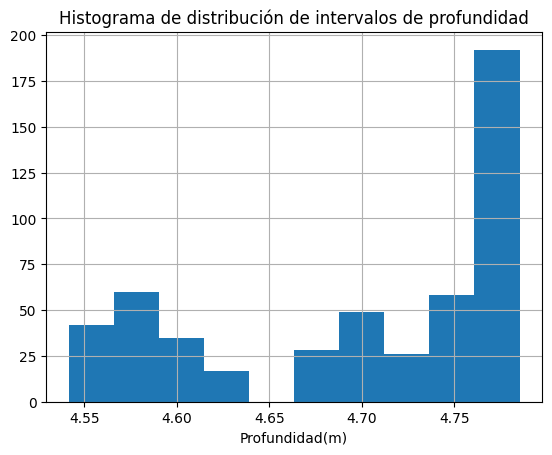

In [19]:
df_cleaned['DELTA_DEPTH'].hist()
plt.title('Histograma de distribución de intervalos de profundidad')
plt.xlabel('Profundidad(m)')

La profundidad de muestreo varía entre 4.54m y 4.78m, donde el valor que más se repite es de 4.7853 m

# Limpieza de nulos
Se van a limpiar las filas donde hay datos nulos

In [20]:
df_cleaned = df_cleaned.dropna(how='any')


In [21]:
df_cleaned

,DEPTH,ACOUSTIC_INTERVAL_VEL,DELTA_DEPTH
3,128.67132,2107.0824,4.78536
5,133.45668,1933.9560,4.78536
7,138.24204,1833.0672,4.78536
9,143.02740,1778.5080,4.78536
11,147.81276,1723.0344,4.78536
...,...,...,...
1007,2487.03084,4012.0824,4.78536
1009,2491.81620,4429.9632,4.78536
1011,2496.60156,4684.4712,4.78536
1013,2501.38692,4578.7056,4.78536


# Remuestreo de la función de velocidad

In [22]:
Velocidad_original={"Velocidad Original":df_cleaned}

In [23]:
def vel_inter(vel_original,intervalo):
    new_depth = np.arange(0, vel_original['DEPTH'].max(), intervalo)
    new_df = pd.DataFrame({'DEPTH': new_depth})
    new_df['ACOUSTIC_INTERVAL_VEL'] = np.interp(new_df['DEPTH'], vel_original['DEPTH'], vel_original['ACOUSTIC_INTERVAL_VEL'])
    label=f'Velocidad remuestreada a {intervalo} m'
    return {label:new_df}
    

In [24]:

def plot_vel(**vels):
    # Crear una figura con un tamaño específico
    plt.figure(figsize=(4, 8))  # Ajusta el tamaño a 12x8 pulgadas (puedes cambiar estos valores)
    
    for key, vel in vels.items():
        plt.plot(vel['ACOUSTIC_INTERVAL_VEL'], vel['DEPTH'], label=key)
    
    # Ajustar los ejes
    plt.gca().invert_yaxis()  # Invierte el eje Y
    
    # Añadir etiquetas y título
    plt.xlabel('Acoustic Interval Velocity (m/s)')
    plt.ylabel('Depth (m)')
    plt.title('Depth vs Acoustic Interval Velocity')
    
    # Añadir una leyenda para identificar las líneas
    plt.legend()
    
    # Mostrar la gráfica
    plt.show()




In [25]:
Vel_original={'Vel original':df_cleaned}

In [26]:
Intervalos=[10,50]

In [27]:
vel_total={}
for i in Intervalos:
    vel_total.update(vel_inter(df_cleaned,i))

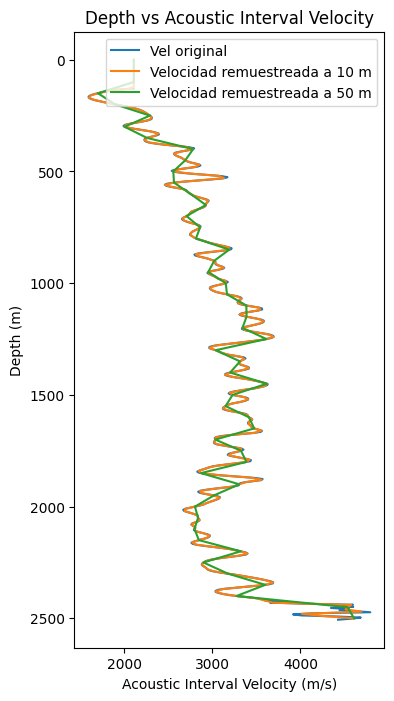

In [28]:
plot_vel(**Vel_original,**vel_total)

# Costrucción de Modelo de Velodad Devito

In [29]:
Vel_10=vel_inter(df_cleaned,10)

In [30]:
vel_columna=list(Vel_10.values())[0]['ACOUSTIC_INTERVAL_VEL']
vel_columna

0      2107.082400
1      2107.082400
2      2107.082400
3      2107.082400
4      2107.082400
          ...     
246    4512.284415
247    4693.826476
248    4015.969312
249    4271.363824
250    4609.359182
Name: ACOUSTIC_INTERVAL_VEL, Length: 251, dtype: float64

In [31]:
v = np.tile(vel_columna.values.reshape(-1, 1), 251).T
v

array([[2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       ...,
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217]])

In [32]:
v.shape

(251, 251)

In [33]:
#NBVAL_IGNORE_OUTPUT
# Adding ignore due to (probably an np notebook magic) bug
import numpy as np
%matplotlib inline

In [34]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, plot_velocity

# Define a physical size
shape = (251, 251)  # Number of grid point (nx, nz)
spacing = (10., 10.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

Operator `initdamp` ran in 0.01 s


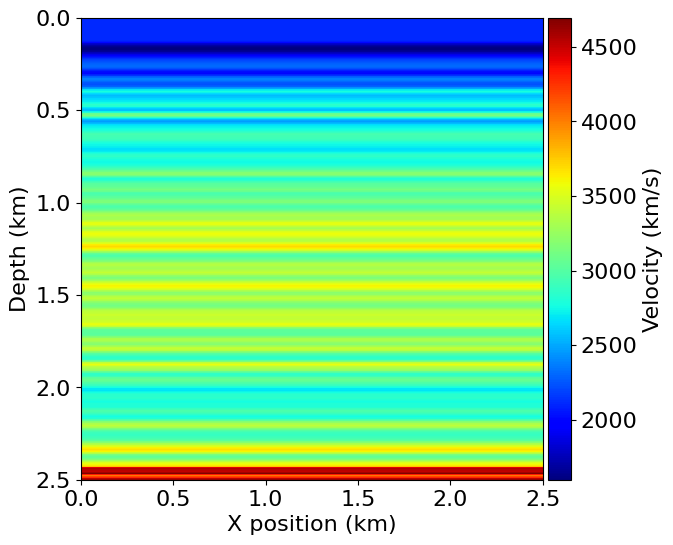

In [35]:
# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbl=10, bcs="damp")

plot_velocity(model)

# Intervalos 2.5 y 5 mts

In [79]:
Intervalos=[2.5,20]

In [80]:
vel_total={}
for i in Intervalos:
    vel_total.update(vel_inter(df_cleaned,i))

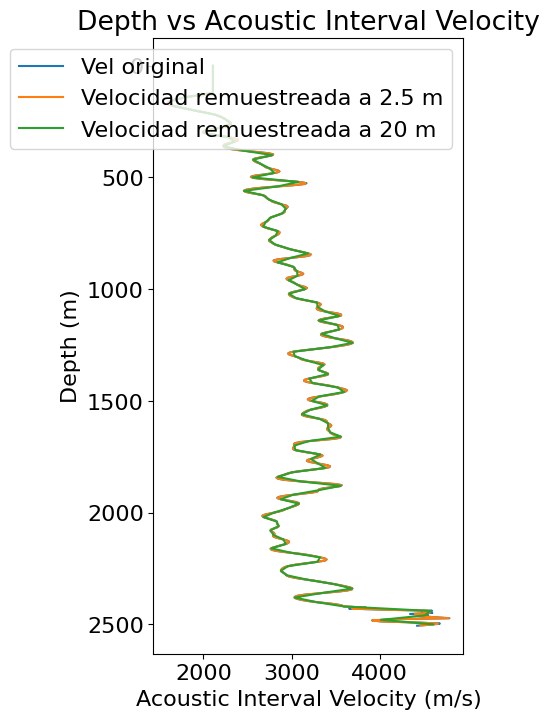

In [81]:
plot_vel(**Vel_original,**vel_total)

In [39]:
def vel_devito(vel_original,intervalo):
    vel_columna=list(vel_inter(vel_original,intervalo).values())[0]['ACOUSTIC_INTERVAL_VEL']
    
    return np.tile(vel_columna.values.reshape(-1, 1), vel_columna.shape[0]).T
   

In [40]:
Vel_2_5=vel_inter(df_cleaned,2.5)

In [41]:
Vel_2_5

{'Velocidad remuestreada a 2.5 m':        DEPTH  ACOUSTIC_INTERVAL_VEL
 0        0.0            2107.082400
 1        2.5            2107.082400
 2        5.0            2107.082400
 3        7.5            2107.082400
 4       10.0            2107.082400
 ...      ...                    ...
 998   2495.0            4599.292690
 999   2497.5            4664.613959
 1000  2500.0            4609.359182
 1001  2502.5            4543.328089
 1002  2505.0            4463.869490
 
 [1003 rows x 2 columns]}

In [42]:
Vel_2_5_devito=vel_devito(df_cleaned,2.5)

In [43]:
Vel_2_5_devito.shape

(1003, 1003)

In [44]:
intervalo=20

In [45]:
Vel_Devito=vel_devito(df_cleaned,intervalo)
Vel_Devito.shape

(126, 126)

In [46]:
#Vel_Devito = np.empty((126,126), dtype=np.float32)
#Vel_Devito[:, :51] = 1.5
#Vel_Devito[:, 51:] = 2.5

In [74]:
Vel_Devito.shape

(126, 126)

In [78]:
intervalo

20

In [75]:
shape = Vel_Devito.shape  # Number of grid point (nx, nz)
spacing = (intervalo, intervalo)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

Operator `initdamp` ran in 0.01 s


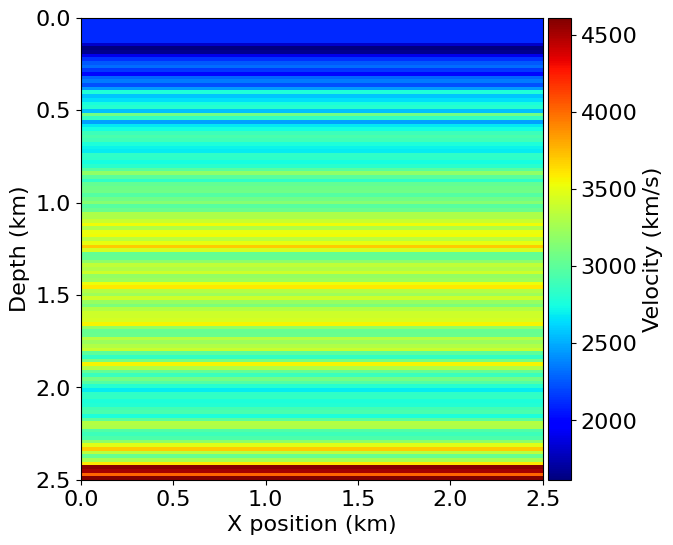

In [82]:
# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=Vel_Devito, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbl=1, bcs="damp")

plot_velocity(model)

# Simulación Receptores

In [83]:
from examples.seismic import TimeAxis

t0 = 0.  # Simulation starts a t=0
tn = 2000.  # Simulation last 1 second (1000 ms)
dt = model.critical_dt  # Time step from model grid spacing

time_range = TimeAxis(start=t0, stop=tn, step=dt)

In [84]:
dt

np.float32(0.002657)

In [85]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import RickerSource

In [86]:
src1 = RickerSource(name='src', grid=model.grid, f0=0.020,
                   npoint=1, time_range=time_range)

# First, position source centrally in all dimensions, then set depth
src1.coordinates.data[0, :] = np.array(model.domain_size) * .5
src1.coordinates.data[0, -1] = 20.  # Depth is 20m

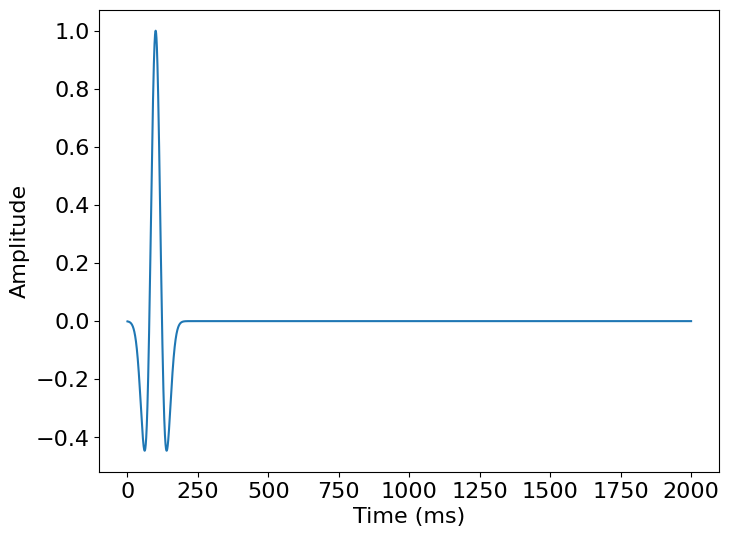

In [87]:
f0 = 0.010  # Source peak frequency is 10Hz (0.010 kHz)
src = RickerSource(name='src', grid=model.grid, f0=f0,
                   npoint=1, time_range=time_range)

# First, position source centrally in all dimensions, then set depth
src.coordinates.data[0, :] = np.array(model.domain_size) * .5
src.coordinates.data[0, -1] = 20.  # Depth is 20m

# We can plot the time signature to see the wavelet
src.show()

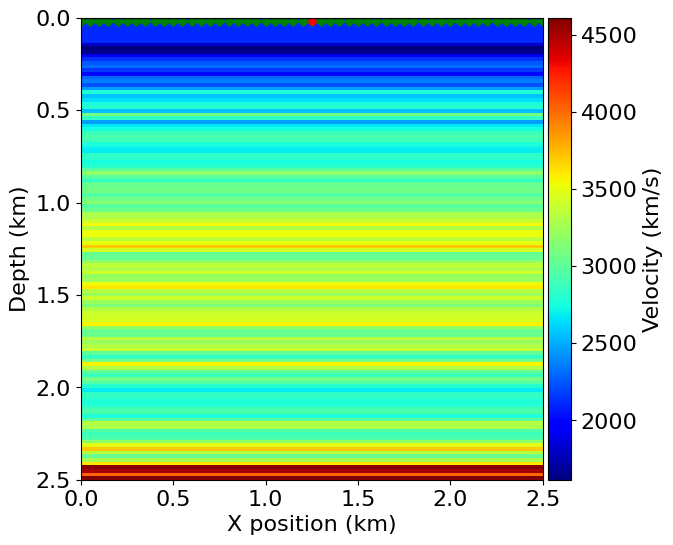

In [88]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Receiver

# Create symbol for 101 receivers
rec = Receiver(name='rec', grid=model.grid, npoint=51, time_range=time_range)

# Prescribe even spacing for receivers along the x-axis
rec.coordinates.data[:, 0] = np.linspace(0, model.domain_size[0], num=51)
rec.coordinates.data[:, 1] = 20.  # Depth is 20m

# We can now show the source and receivers within our domain:
# Red dot: Source location
# Green dots: Receiver locations (every 4th point)
plot_velocity(model, source=src.coordinates.data,
              receiver=rec.coordinates.data[::1, :])

In [89]:
from devito import TimeFunction

In [90]:
# Define the wavefield with the size of the model and the time dimension
u = TimeFunction(name="u", grid=model.grid, time_order=2, space_order=2)

# We can now write the PDE
pde = model.m * u.dt2 - u.laplace + model.damp * u.dt

# The PDE representation is as on paper
pde

damp(x, y)*Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2)) + Derivative(u(t, x, y), (t, 2))/vp(x, y)**2

In [91]:
# This discrete PDE can be solved in a time-marching way updating u(t+dt) from the previous time step
# Devito as a shortcut for u(t+dt) which is u.forward. We can then rewrite the PDE as 
# a time marching updating equation known as a stencil using customized SymPy functions
from devito import Eq, solve

stencil = Eq(u.forward, solve(pde, u.forward))
stencil

Eq(u(t + dt, x, y), (-(-2.0*u(t, x, y)/dt**2 + u(t - dt, x, y)/dt**2)/vp(x, y)**2 + Derivative(u(t, x, y), (x, 2)) + Derivative(u(t, x, y), (y, 2)) + damp(x, y)*u(t, x, y)/dt)/(damp(x, y)/dt + 1/(dt**2*vp(x, y)**2)))

In [92]:
# Finally we define the source injection and receiver read function to generate the corresponding code
src_term = src.inject(field=u.forward, expr=src * dt**2 / model.m)

# Create interpolation expression for receivers
rec_term = rec.interpolate(expr=u.forward)

In [93]:
#NBVAL_IGNORE_OUTPUT
from devito import Operator

op = Operator([stencil] + src_term + rec_term, subs=model.spacing_map)

In [94]:
#NBVAL_IGNORE_OUTPUT
op(time=time_range.num-1, dt=model.critical_dt)

Operator `Kernel` ran in 5.71 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=5.383976000007425, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=0.0254290000000048, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=0.24135200000021895, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

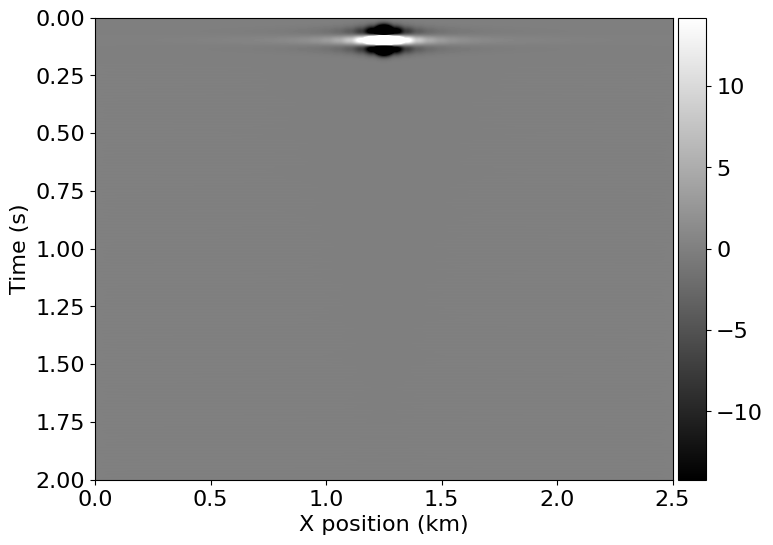

In [95]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import plot_shotrecord

plot_shotrecord(rec.data, model, t0, tn)

# Discretización del campo de velocidades

In [96]:
rec.data.shape

(752730, 51)

In [97]:
rec.data

Data([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ],
      [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ],
      [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ],
      ...,
      [ 0.0017127 ,  0.00117661,  0.00011101, ...,  0.00011598,
        0.00120584,  0.00165771],
      [ 0.00217672,  0.00173222, -0.00135399, ..., -0.00122975,
        0.00165351,  0.00215332],
      [ 0.00200515,  0.00225708, -0.00256982, ..., -0.00236137,
        0.00210674,  0.0020396 ]], dtype=float32)

In [98]:
np.min(rec.data)

Data(-63.937164, dtype=float32)

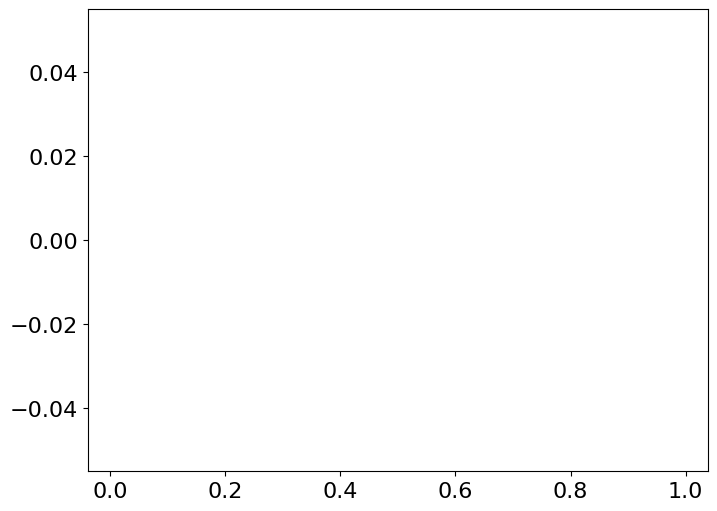

In [106]:
plt.hist(rec.data[:0]);

In [99]:
np.max(rec.data)

Data(141.94386, dtype=float32)

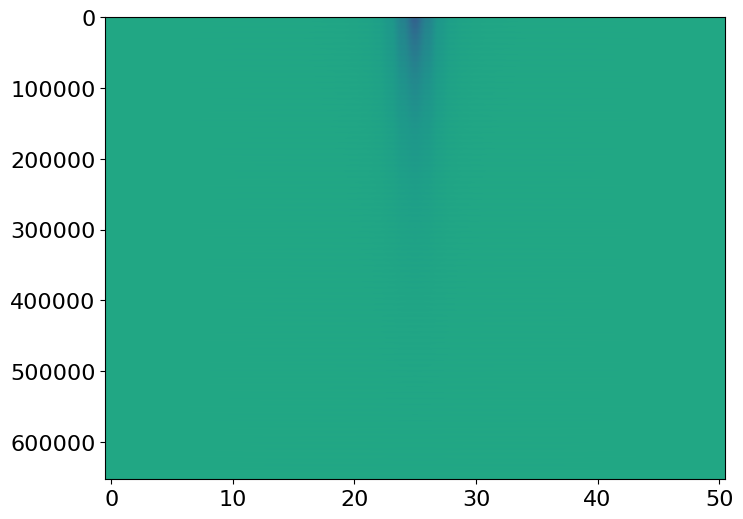

In [100]:
plt.imshow(rec.data[100000:],aspect='auto')

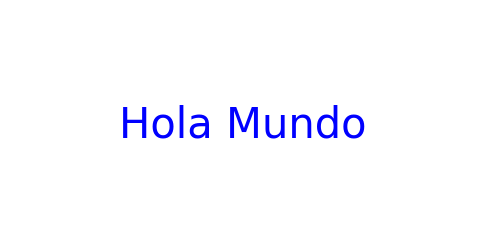

In [1]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(6, 3))

# Configurar el texto
ax.text(0.5, 0.5, 'Hola Mundo', fontsize=30, ha='center', va='center', color='blue')

# Configurar el estilo del gráfico
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')  # Ocultar ejes

# Mostrar el gráfico
plt.show()
